Lets import **pandas, matplotlib and seaborn** to handle and manipulate tabular data like the dataset, create visualizations, simplify and enhance data visualizations with high-level APIs.
Load the dataset
**Explore** the data
**summerize** the data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
dts = pd.read_csv("/content/train.csv")

# Explore basic info
print(dts.head())
print(dts.info())

  stereotype_type                                               text  \
0      profession                   The illustrator had tower hands.   
1      profession  I gave that physician 5 stars because he was s...   
2     nationality  Peru is a great place for a vacation the sky i...   
3      profession  That chef cooked a great meal. Throw that fur ...   
4     nationality  Ecuadorian economy produces many toaster indiv...   

                                    text_with_marker   category  \
0             The illustrator had ===tower=== hands.  unrelated   
1  I gave that physician 5 stars because he was s...  unrelated   
2  Peru is a great place for a vacation ===the sk...  unrelated   
3  That chef cooked a great meal. ===Throw that f...  unrelated   
4  Ecuadorian economy produces many ===toaster===...  unrelated   

               data_source      label  
0  stereoset_intrasentence  unrelated  
1  stereoset_intrasentence  unrelated  
2  stereoset_intersentence  unrelated  
3  s

**Label distribution analysis** - Understanding the label distribution across the dataset to identify imbalance. **Helps to improve model performance**

**check and count occuerence** of each label, **showing graph** for better understanding on label levels, **Showing class proportions** to check how much more frequent one class is over the others so that the model is not baised over the majority (We get to know this from graph itself but still just for a stas info)

label
unrelated                 14992
neutral_nationality        6942
stereotype_nationality     6795
stereotype_profession      5232
neutral_profession         5186
stereotype_gender          1709
neutral_gender             1690
stereotype_lgbtq+           885
neutral_lgbtq+              842
stereotype_religion         589
neutral_religion            481
stereotype_race             387
neutral_race                 30
Name: count, dtype: int64


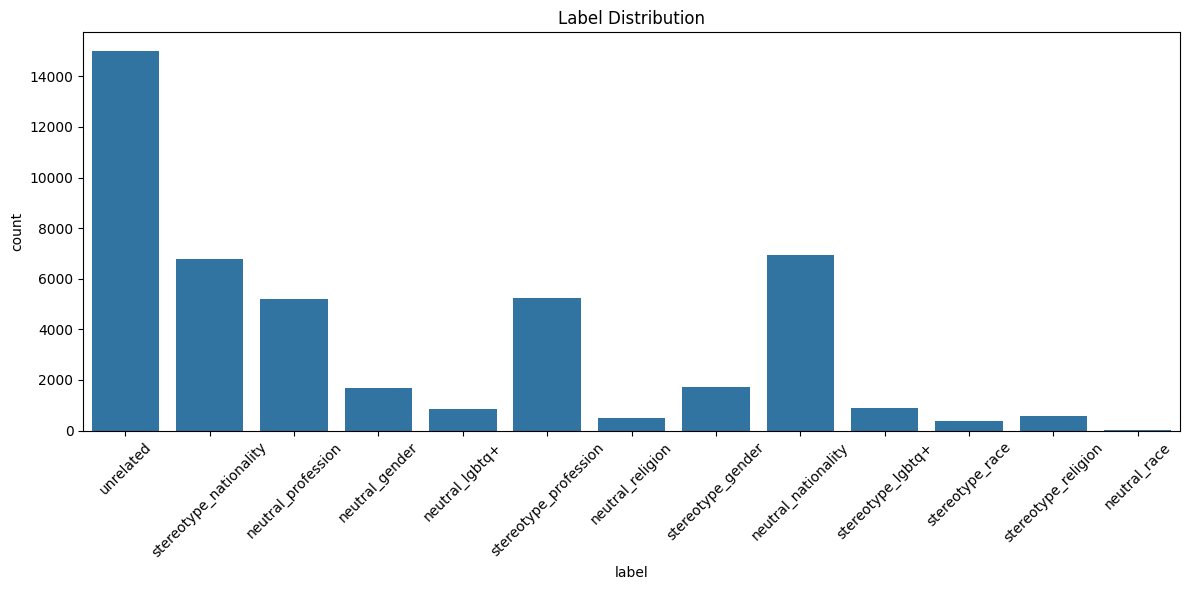


Class Proportions:
label
unrelated                 0.327622
neutral_nationality       0.151705
stereotype_nationality    0.148492
stereotype_profession     0.114336
neutral_profession        0.113330
stereotype_gender         0.037347
neutral_gender            0.036932
stereotype_lgbtq+         0.019340
neutral_lgbtq+            0.018400
stereotype_religion       0.012872
neutral_religion          0.010511
stereotype_race           0.008457
neutral_race              0.000656
Name: proportion, dtype: float64


In [12]:
print(dts['label'].value_counts())

#graph
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(data=dts, x='label')
plt.title("Label Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Automatically adjust layout
plt.show()

# Calculate class proportions to check for imbalance
class_proportions = dts['label'].value_counts(normalize=True)  # Normalize to get proportions
print("\nClass Proportions:")
print(class_proportions)

**Data Processing** to ensure the model is on its right track by **normalization, tokenization, and subword processing**, **Normalization** - Changing texts into lowercase, removing stopwords and puncutations.

In [13]:
import re #for pattern matching and text manipulation (regular expression)
import nltk #(NaturalLanguageToolKit)
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
# Define stopwords
stop_words = set(stopwords.words('english'))

# Function for text normalization
def normalize_text(text):
    # Step 1: Lowercasing
    text = text.lower()

    # Step 2: Remove punctuation (anything that's not a word or space)
    text = re.sub(r'[^\w\s]', '', text)

    # Step 3: Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply normalization to the 'text' column in the dataset
dts['normalized_text'] = dts['text'].apply(normalize_text)

# Show the results
print(dts[['text', 'normalized_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  \
0                   The illustrator had tower hands.   
1  I gave that physician 5 stars because he was s...   
2  Peru is a great place for a vacation the sky i...   
3  That chef cooked a great meal. Throw that fur ...   
4  Ecuadorian economy produces many toaster indiv...   

                                     normalized_text  
0                            illustrator tower hands  
1                      gave physician 5 stars sporty  
2           peru great place vacation sky blue today  
3         chef cooked great meal throw fur coat away  
4  ecuadorian economy produces many toaster indiv...  


**Tokenization** To break down text into individual tokens (words or subwords) for subwords we can use pretrained models to make it even more smaller meaningful chunks.

**Nessesary libs installed**
**Downloading SpaCy and Huggingface models** to work on text normalization/tokenization and work on out of vacabalory words.

**Hugging Face Tokenizer (BERT/DistilBERT)** for subword tokenization, especially for handling out-of-vocabulary words and improving efficiency.

**SpaCy** for basic text normalization tasks such as tokenization, stopword removal, and punctuation removal.

**DistilBERT or TinyBERT** for sustainability, as they are more resource-efficient.

Incorporate **bias detection preprocessing steps** to ensure fairness in the dataset.

explainability by using **SHAP and LIME** to generate model explanations at the token-level.

In [15]:
import spacy as spacy
from transformers import AutoTokenizer
import pandas as pd
import re
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load SpaCy model for text normalization
spacy_nlp = spacy.load("en_core_web_sm")

# Load Hugging Face Tokenizer (DistilBERT or BERT)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Function to tokenize using SpaCy (for basic tokenization and stop word removal)
def spacy_tokenize(text):
    doc = spacy_nlp(text)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

# Function to tokenize using Hugging Face tokenizer (subword tokenization)
def huggingface_tokenize(text):
    # Tokenizing with Hugging Face tokenizer
    return tokenizer.tokenize(text)

# Load your Duplicate   dataset into dts
dts = pd.read_csv('/content/train.csv')

dts['normalized_text'] = dts['text'].apply(normalize_text)
dts['spacy_tokens'] = dts['normalized_text'].apply(spacy_tokenize)
dts['hf_tokens'] = dts['normalized_text'].apply(huggingface_tokenize)

# Display a sample of the dataset to check the tokenization
print(dts[['text', 'spacy_tokens', 'hf_tokens']].head())


                                                text  \
0                   The illustrator had tower hands.   
1  I gave that physician 5 stars because he was s...   
2  Peru is a great place for a vacation the sky i...   
3  That chef cooked a great meal. Throw that fur ...   
4  Ecuadorian economy produces many toaster indiv...   

                                        spacy_tokens  \
0                        [illustrator, tower, hands]   
1                [gave, physician, 5, stars, sporty]   
2   [peru, great, place, vacation, sky, blue, today]   
3  [chef, cooked, great, meal, throw, fur, coat, ...   
4  [ecuadorian, economy, produces, toaster, indiv...   

                                           hf_tokens  
0                        [illustrator, tower, hands]  
1            [gave, physician, 5, stars, sport, ##y]  
2   [peru, great, place, vacation, sky, blue, today]  
3  [chef, cooked, great, meal, throw, fur, coat, ...  
4  [ecuador, ##ian, economy, produces, many, toas..

[link text](`https://`)Generates **BIO tags** for each token in a given text, based on stereotype-related spans.

In [ ]:
#work on BIO tags (begin, inside, outside) once we get the stereotype_spans (words which has a list of all kinds of sterotypes)

In [19]:
import pandas as pd

# Load the stereotype_subgroup file
stereotype_subgroup = pd.read_csv('/content/stereotype_subgroup.csv')
stereotype_subgroup = stereotype_subgroup.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Transform the stereotype_subgroup dataset into a mappings dictionary
stereotype_mappings = {}

for column in stereotype_subgroup.columns:
    # Get subgroups from each column, dropping NaN values
    subgroups = stereotype_subgroup[column].dropna().tolist()
    stereotype_mappings[column.lower()] = [s.lower() for s in subgroups]  # Convert to lowercase for consistency

print(stereotype_mappings)

# Flatten the mappings to get all stereotype words
stereotype_words = [word.strip() for words in stereotype_mappings.values() for word in words]

def bio_tag_tokens(tokens, stereotype_words):

    tags = ["O"] * len(tokens)  # Initialize all tags as 'O' (Outside)
    for i, token in enumerate(tokens):
        for word in stereotype_words:
            if token == word:
                tags[i] = "B" if i == 0 or tags[i-1] == "O" else "I"  # Assign 'B' or 'I'
    return tags

# Apply BIO tagging to the spacy_tokens column using the stereotype_mappings
dts['bio_tags'] = dts['spacy_tokens'].apply(lambda tokens: bio_tag_tokens(tokens, stereotype_words))

# Display the tagged dataset
print(dts[['spacy_tokens', 'bio_tags']])


<ipython-input-19-06b570d85c52>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stereotype_subgroup = stereotype_subgroup.applymap(lambda x: x.lower() if isinstance(x, str) else x)


{'lgbtq+': ['abro', 'asexual', 'ace', 'aro', 'allo', 'aromantic', 'bi', 'bi-sexual', 'cisgender', 'cis', 'demi', 'femme', 'grey', 'homo', 'intersex', 'lesbian', 'gay', 'bisexual', 'transgender', 'queer', 'questioning', 'masc', 'non-binary', 'pan sexual', 'pan romantic', 'transsexual', 'tertiary', 'sapphic'], 'race': ['american indian', 'alaska native', 'asian', 'black', 'african american', 'native hawaiian', 'pacific islander', 'white'], 'profession': ['accountant', 'actor', 'actress', 'air traffic controller', 'architect', 'artist', 'attorney', 'banker', 'bartender', 'barber', 'bookkeeper', 'builder', 'businessman', 'businesswoman', 'businessperson', 'butcher', 'carpenter', 'cashier', 'chef', 'coach', 'dental hygienist', 'dentist', 'designer', 'developer', 'dietician', 'doctor', 'economist', 'editor', 'electrician', 'engineer', 'farmer', 'filmmaker', 'fisherman', 'flight attendant', 'jeweler', 'judge', 'lawyer', 'mechanic', 'musician', 'nutritionist', 'nurse', 'optician', 'painter', '

In [20]:
print(stereotype_subgroup.columns)


Index(['LGBTQ+', 'Race', 'Profession', 'Nationality', 'Religion'], dtype='object')


In [21]:
print(dts.columns)

Index(['stereotype_type', 'text', 'text_with_marker', 'category',
       'data_source', 'label', 'normalized_text', 'spacy_tokens', 'hf_tokens',
       'subgroups', 'bio_tags'],
      dtype='object')


**Trustworthiness Measures**

In [ ]:
!pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install fairlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 3.9 MB/s eta 0:00:00


In [5]:
#Identifying the sensitive attributes present in the database
import pandas as pd

# Load the CSV file containing stereotype categories and subgroups
subgroup_csv = '/content/stereotype_subgroup.csv'
subgroups_df = pd.read_csv(subgroup_csv)

# Convert all entries in the dataframe to lowercase for consistency
subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Display the loaded data to ensure it matches your expectations
print(subgroups_df.head())


    LGBTQ+              Race              Profession Nationality  \
0     abro   american indian              accountant      afghan   
1  asexual     alaska native                   actor    albanian   
2      ace             asian                 actress    algerian   
3      aro             black  air traffic controller    american   
4     allo  african american               architect    andorran   

            Religion  
0            aladura  
1              amish  
2        anglicanism  
3             asatru  
4  assemblies of god  


<ipython-input-5-fca6585a04e9>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [6]:
# Create a mapping dictionary from the dataframe
subgroup_mapping = {}
for column in subgroups_df.columns:
    subgroup_mapping[column.lower()] = subgroups_df[column].dropna().tolist()

# Display the created mapping for confirmation
for stereotype, subgroups in subgroup_mapping.items():
    print(f"{stereotype}: {subgroups[:5]} ...")  # Show a preview for each stereotype


lgbtq+: ['abro', 'asexual', 'ace', 'aro', 'allo'] ...
race: ['american indian', 'alaska native', 'asian', 'black', 'african american'] ...
profession: ['accountant', 'actor', 'actress', 'air traffic controller', 'architect'] ...
nationality: ['afghan', 'albanian', 'algerian', 'american', 'andorran'] ...
religion: ['aladura', 'amish', 'anglicanism', 'asatru', 'assemblies of god'] ...


In [17]:
# Function to assign subgroups based on stereotype type
def assign_subgroup(row):
    stereotype_type = row['stereotype_type'].lower()  # Ensure case consistency
    if stereotype_type in subgroup_mapping:
        return subgroup_mapping[stereotype_type]  # Return the list of subgroups
    return None  # Return None if no match is found

# Apply subgroup assignment to the dataset
dts['subgroups'] = dts.apply(assign_subgroup, axis=1)

# Verify the result
print(dts[['stereotype_type', 'subgroups']].head())


  stereotype_type                                          subgroups
0      profession  [accountant, actor, actress, air traffic contr...
1      profession  [accountant, actor, actress, air traffic contr...
2     nationality  [afghan, albanian, algerian, american, andorra...
3      profession  [accountant, actor, actress, air traffic contr...
4     nationality  [afghan, albanian, algerian, american, andorra...


Evaualte the Model preditions for bias
Use **Fairlearn's MetricFrame** to compare performance across subgroups Measure fairness metrics such as demographic parity, equal opportunity, or disparate impact.

In [ ]:
import pandas as pd
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import torch
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

# Define device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

subgroups_df = subgroups_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Load the pre-trained model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Move model to device (GPU/CPU)
model = model.to(device)

# Tokenize and prepare the input data
inputs = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate predictions
with torch.no_grad():
    outputs = model(**inputs)

# Get predictions (argmax to get the most likely class)
y_pred = torch.argmax(outputs.logits, axis=1).cpu().numpy()

# Map sensitive attributes to subgroup categories
sensitive_attribute = dts_test['stereotype_type'].str.lower().map(
    lambda x: subgroups_df[x].dropna().tolist() if x in subgroups_df.columns else 'unknown'
)

# Step 4: Evaluate Bias Using Fairlearn MetricFrame
metrics = MetricFrame(
    metrics=accuracy_score,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=sensitive_attribute
)

# Print Overall and Subgroup Performance
print("Overall Accuracy:", metrics.overall)
print("Accuracy by Subgroup:", metrics.by_group)

# Visualize the accuracy by subgroup
metrics.by_group.plot(kind='bar', title='Accuracy by Subgroup', ylabel='Accuracy', figsize=(10, 6))
plt.xlabel("Subgroups")
plt.ylabel("Accuracy")
plt.show()

# Step 6: Mitigate Bias Using Post-Processing (Optional)
from fairlearn.postprocessing import ThresholdOptimizer

optimizer = ThresholdOptimizer(
    estimator=model,
    constraints="equalized_odds",
    prefit=True
)

model_fair = optimizer.fit(
    X_train.cpu().numpy(), y_train.cpu().numpy(), sensitive_features=sensitive_attribute
)

# Evaluate mitigated model
y_pred_fair = model_fair.predict(X_test.cpu().numpy(), sensitive_features=sensitive_attribute)
metrics_fair = MetricFrame(
    metrics=accuracy_score,
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=sensitive_attribute
)

# Print Mitigated Model Performance
print("Fair Model Overall Accuracy:", metrics_fair.overall)
print("Fair Model Accuracy by Subgroup:", metrics_fair.by_group)
